In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/favorita-grocery-sales-forecasting/test.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/stores.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/items.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/holidays_events.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/transactions.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/train.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/oil.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/sample_submission.csv.7z


In [15]:
!pip install kaggle
# !pip install py7zr
!pip install dask
!pip install dask[dataframe]
!pip install pyunpack
!pip install patool
#os.system('apt-get install p7zip')
!pip install -U -q PyDrive
!pip install dask dask-ml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 4.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1

In [16]:
#from google.colab import files
import os
import py7zr
import os
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
#from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
import os
import zipfile
import py7zr
import dask.dataframe as dd

# Chemin vers le répertoire des fichiers téléchargés
input_dir = '/kaggle/input/favorita-grocery-sales-forecasting/'

# Chemin vers le répertoire où les fichiers seront extraits
output_dir = '/kaggle/working/'

# Fonction pour décompresser les fichiers .7z
def extract_7z_files(input_dir, output_dir):
    zip_files = [f for f in os.listdir(input_dir) if f.endswith('.7z')]
    if not zip_files:
        print("Aucun fichier .7z trouvé dans le répertoire.")
    else:
        for zip_file in zip_files:
            file_path = os.path.join(input_dir, zip_file)
            try:
                with py7zr.SevenZipFile(file_path, mode='r') as z:
                    z.extractall(path=output_dir)
            except Exception as e:
                print(f"Erreur lors de la décompression de {zip_file}: {e}")

# Fonction pour décompresser les fichiers .zip
def extract_zip_files(input_dir, output_dir):
    zip_files = [f for f in os.listdir(input_dir) if f.endswith('.zip')]
    if not zip_files:
        print("Aucun fichier .zip trouvé dans le répertoire.")
    else:
        for zip_file in zip_files:
            file_path = os.path.join(input_dir, zip_file)
            try:
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(output_dir)
            except Exception as e:
                print(f"Erreur lors de la décompression de {zip_file}: {e}")

# Extraction des fichiers
extract_7z_files(input_dir, output_dir)
extract_zip_files(input_dir, output_dir)

Aucun fichier .zip trouvé dans le répertoire.


In [18]:
# Vérifier les fichiers extraits
extracted_files = os.listdir(output_dir)
print(extracted_files)

# Lire les fichiers CSV avec Dask
csv_files = [f for f in extracted_files if f.endswith('.csv')]

data = {}
for csv_file in csv_files:
    file_path = os.path.join(output_dir, csv_file)
    try:
        df = dd.read_csv(file_path, assume_missing=True)
        data[csv_file.replace('.csv', '')] = df
    except Exception as e:
        print(f"Erreur lors de la lecture de {csv_file}: {e}")

# Afficher les données des fichiers CSV
for csv_file in csv_files:
    file_path = os.path.join(output_dir, csv_file)
    try:
        df = dd.read_csv(file_path, dtype={"onpromotion": "object"}, assume_missing=True)
        print(f"Contenu du fichier {csv_file}:")
        print(df.head())
    except Exception as e:
        print(f"Erreur lors de la lecture de {csv_file}: {e}")


['train.csv', 'items.csv', 'transactions.csv', 'sample_submission.csv', '.virtual_documents', 'holidays_events.csv', 'stores.csv', 'oil.csv', 'test.csv']
Contenu du fichier train.csv:
    id        date  store_nbr  item_nbr  unit_sales onpromotion
0  0.0  2013-01-01       25.0  103665.0         7.0         NaN
1  1.0  2013-01-01       25.0  105574.0         1.0         NaN
2  2.0  2013-01-01       25.0  105575.0         2.0         NaN
3  3.0  2013-01-01       25.0  108079.0         1.0         NaN
4  4.0  2013-01-01       25.0  108701.0         1.0         NaN
Contenu du fichier items.csv:
   item_nbr        family   class  perishable
0   96995.0     GROCERY I  1093.0         0.0
1   99197.0     GROCERY I  1067.0         0.0
2  103501.0      CLEANING  3008.0         0.0
3  103520.0     GROCERY I  1028.0         0.0
4  103665.0  BREAD/BAKERY  2712.0         1.0
Contenu du fichier transactions.csv:
         date  store_nbr  transactions
0  2013-01-01       25.0         770.0
1  2013-01-

/opt/conda/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


**Etape2: Préparation des données**

In [19]:
# Fusionner les DataFrames
train = data['train']
items = data['items']
stores = data['stores']
holidays_events = data['holidays_events']
transactions = data['transactions']
oil = data['oil']

# Fusionner les données de ventes avec les informations sur les articles et les magasins
train = train.merge(items, on='item_nbr', how='left')
train = train.merge(stores, on='store_nbr', how='left')

# Fusionner les données de ventes avec les informations sur les transactions
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')

# Fusionner les données de ventes avec les informations sur les jours fériés et les événements
train = train.merge(holidays_events, on='date', how='left')

# Fusionner les données de ventes avec les informations sur le prix du pétrole
train = train.merge(oil, on='date', how='left')

# Afficher les premières lignes du DataFrame fusionné
print(train.head())


    id        date  store_nbr  item_nbr  unit_sales  onpromotion  \
0  0.0  2013-01-01       25.0  103665.0         7.0          NaN   
1  1.0  2013-01-01       25.0  105574.0         1.0          NaN   
2  2.0  2013-01-01       25.0  105575.0         2.0          NaN   
3  3.0  2013-01-01       25.0  108079.0         1.0          NaN   
4  4.0  2013-01-01       25.0  108701.0         1.0          NaN   

         family   class  perishable     city        state type_x  cluster  \
0  BREAD/BAKERY  2712.0         1.0  Salinas  Santa Elena      D      1.0   
1     GROCERY I  1045.0         0.0  Salinas  Santa Elena      D      1.0   
2     GROCERY I  1045.0         0.0  Salinas  Santa Elena      D      1.0   
3     GROCERY I  1030.0         0.0  Salinas  Santa Elena      D      1.0   
4          DELI  2644.0         1.0  Salinas  Santa Elena      D      1.0   

   transactions   type_y    locale locale_name         description  \
0         770.0  Holiday  National     Ecuador  Primer dia

In [20]:
# Suppression des valeurs manquantes
train = train.dropna(subset=['onpromotion', 'dcoilwtico', 'transactions', 'transferred', 'locale_name', 'description', 'locale', 'type_y'])


In [21]:
# Calcul du nombre de NA par colonne
na_counts = train.isna().sum().compute()

# Affichage des résultats
print("Nombre de valeurs manquantes (NA) par colonne :")
print(na_counts)


/opt/conda/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Nombre de valeurs manquantes (NA) par colonne :
id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
family          0
class           0
perishable      0
city            0
state           0
type_x          0
cluster         0
transactions    0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64


/opt/conda/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/opt/conda/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


In [22]:
print(len(train))

12560600


In [23]:
# Trier les données par date en ordre décroissant pour obtenir les observations les plus récentes en premier
train = train.sort_values(by='date', ascending=False)

# 4. Sélectionner les 5% les plus récentes
train_model = train.head(int(len(train) * 0.16))
train_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009696 entries, 1499187 to 1374195
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            float64
 1   date          object 
 2   store_nbr     float64
 3   item_nbr      float64
 4   unit_sales    float64
 5   onpromotion   float64
 6   family        object 
 7   class         float64
 8   perishable    float64
 9   city          object 
 10  state         object 
 11  type_x        object 
 12  cluster       float64
 13  transactions  float64
 14  type_y        object 
 15  locale        object 
 16  locale_name   object 
 17  description   object 
 18  transferred   object 
 19  dcoilwtico    float64
dtypes: float64(10), object(10)
memory usage: 322.0+ MB


In [24]:
# Sauvegarder le DataFrame train_model sous forme de fichier CSV
train_model.to_csv('/kaggle/working/train_model.csv', index=False)
print("Le fichier CSV a été sauvegardé dans l'environnement Kaggle.")


Le fichier CSV a été sauvegardé dans l'environnement Kaggle.


In [28]:
import dask.dataframe as dd

# Charger le fichier train_model.csv en utilisant Dask
train_model = dd.read_csv('/kaggle/working/train_model.csv')

# Fonction pour convertir la colonne 'date' en type datetime et extraire des fonctionnalités
def preprocess_date(df):
    df['date'] = dd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    return df

# Exemple d'utilisation de la fonction preprocess_date
train_model = preprocess_date(train_model)

# Afficher les premières lignes du DataFrame après prétraitement
print(train_model.head())

# Sauvegarder le DataFrame prétraité sous forme de fichier CSV
output_file = '/kaggle/working/train_model_preprocessed.csv'
train_model.compute().to_csv(output_file, index=False)
print(f"Le fichier prétraité a été sauvegardé sous {output_file}")


            id       date  store_nbr   item_nbr  unit_sales  onpromotion  \
0  125458564.0 2017-08-15       37.0  1037857.0         4.0          0.0   
1  125497024.0 2017-08-15       54.0  2081056.0         1.0          0.0   
2  125497035.0 2017-08-15       54.0  2089339.0         4.0          0.0   
3  125497034.0 2017-08-15       54.0  2089036.0         4.0          0.0   
4  125497033.0 2017-08-15       54.0  2088922.0         7.0          0.0   

           family   class  perishable       city  ...   type_y locale  \
0       BEVERAGES  1120.0         0.0     Cuenca  ...  Holiday  Local   
1  PREPARED FOODS  2986.0         1.0  El Carmen  ...  Holiday  Local   
2       GROCERY I  1006.0         0.0  El Carmen  ...  Holiday  Local   
3       GROCERY I  1034.0         0.0  El Carmen  ...  Holiday  Local   
4       GROCERY I  1076.0         0.0  El Carmen  ...  Holiday  Local   

   locale_name            description transferred dcoilwtico  year month  day  \
0     Riobamba  Fundaci

In [33]:
# Convertir en Pandas DataFrame pour la visualisation et le traitement ultérieur
train_model_pd = train_model.compute()

# Sauvegarder le DataFrame prétraité sous forme de fichier CSV
output_file = '/kaggle/working/train_model_preprocessed.csv'
train_model_pd.to_csv(output_file, index=False)
print(f"Le fichier prétraité a été sauvegardé sous {output_file}")


Le fichier prétraité a été sauvegardé sous /kaggle/working/train_model_preprocessed.csv


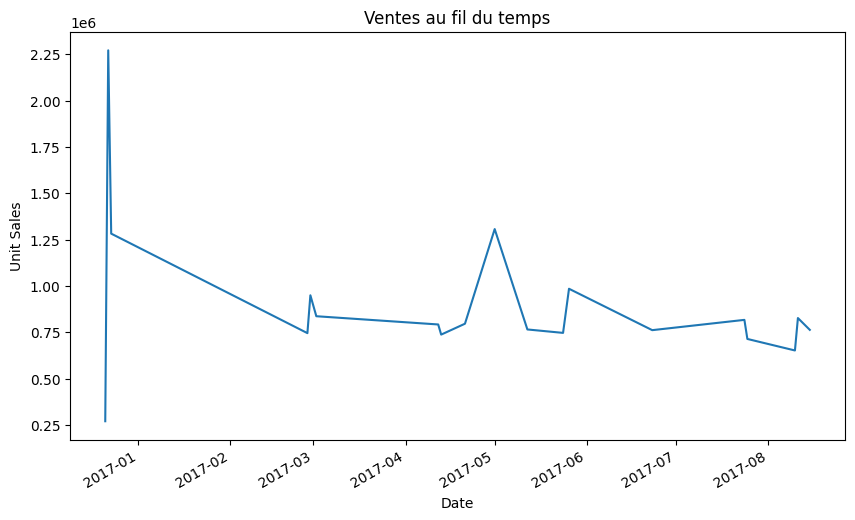

In [34]:
import matplotlib.pyplot as plt

# Grouper les données par date et calculer la somme des ventes
sales_by_date = train_model_pd.groupby('date')['unit_sales'].sum()

# Plot des ventes au fil du temps
plt.figure(figsize=(10, 6))
sales_by_date.plot(title="Ventes au fil du temps")
plt.xlabel("Date")
plt.ylabel("Unit Sales")
plt.show()


In [36]:
import dask.dataframe as dd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Charger le fichier train_model_preprocessed.csv en utilisant Dask
train_model_preprocessed = dd.read_csv('/kaggle/working/train_model_preprocessed.csv')

# Convertir le DataFrame Dask en Pandas
train_model_pd = train_model_preprocessed.compute()


In [ ]:
# Ajuster le modèle SARIMA
model = SARIMAX(train_model_pd['unit_sales'], 
                order=(1, 1, 1),  # Paramètres ARIMA
                seasonal_order=(1, 1, 1, 7),  # Paramètres saisonniers (7 jours pour la saisonnalité hebdomadaire)
                enforce_stationarity=False, 
                enforce_invertibility=False)
sarima_model = model.fit()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94897D+00    |proj g|=  1.50928D-01


 This problem is unconstrained.



At iterate    5    f=  4.88144D+00    |proj g|=  7.66049D-01

At iterate   10    f=  4.85807D+00    |proj g|=  1.70776D-01

At iterate   15    f=  4.85627D+00    |proj g|=  1.46507D-01

At iterate   20    f=  4.85584D+00    |proj g|=  1.01679D-01

At iterate   25    f=  4.83287D+00    |proj g|=  6.38003D-01

At iterate   30    f=  4.71437D+00    |proj g|=  4.77501D-01
  ys=-9.850E-04  -gs= 1.862E-03 BFGS update SKIPPED

At iterate   35    f=  4.71421D+00    |proj g|=  4.79520D-01

At iterate   40    f=  4.70674D+00    |proj g|=  6.84966D-01

At iterate   45    f=  4.70592D+00    |proj g|=  2.87978D-01

At iterate   50    f=  4.70541D+00    |proj g|=  2.73222D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Afficher un résumé du modèle ajusté
print(sarima_model.summary())